In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define parameters
m = 1.0  # Mass of the pendulum
L = 10.0  # Length of the pendulum
g = 9.81  # Acceleration due to gravity

# Define initial conditions
degree = float(input("First Enter 10 degrees, then 100 degrees: "))
theta_0 = np.deg2rad(degree)  # Initial angle
omega_0 = 0.0  # Initial angular velocity

# Define time step and duration
dt = 0.01  # Time step
T = 10.0  # Duration in seconds

# Define arrays for storing results
t = np.arange(0.0, T, dt)  # Time array
theta_euler = np.zeros_like(t)  # Euler method results
omega_euler = np.zeros_like(t)
theta_eulercromer = np.zeros_like(t)  # Euler-Cromer method results
omega_eulercromer = np.zeros_like(t)
energy_euler = np.zeros_like(t)  # Energy using Euler method
energy_eulercromer = np.zeros_like(t)  # Energy using Euler-Cromer method

# Set initial values
theta_euler[0] = theta_0
omega_euler[0] = omega_0
theta_eulercromer[0] = theta_0
omega_eulercromer[0] = omega_0
energy_euler[0] = 0.5 * m * L**2 * omega_0**2 - m * g * L * np.cos(theta_0)
energy_eulercromer[0] = energy_euler[0]

In [3]:
# Solve the equations of motion using Euler method
for i in range(1, len(t)):
    # Update theta and omega
    theta_euler[i] = theta_euler[i-1] + omega_euler[i-1] * dt
    omega_euler[i] = omega_euler[i-1] - (g/L) * np.sin(theta_euler[i-1]) * dt
    
    # Calculate energy
    energy_euler[i] = 0.5 * m * L**2 * omega_euler[i]**2 - m * g * L * np.cos(theta_euler[i])

# Solve the equations of motion using Euler-Cromer method
for i in range(1, len(t)):
    # Update omega and theta
    omega_eulercromer[i] = omega_eulercromer[i-1] - (g/L) * np.sin(theta_eulercromer[i-1]) * dt
    theta_eulercromer[i] = theta_eulercromer[i-1] + omega_eulercromer[i] * dt
    
    # Calculate energy
    energy_eulercromer[i] = 0.5 * m * L**2 * omega_eulercromer[i]**2 - m * g * L * np.cos(theta_eulercromer[i])

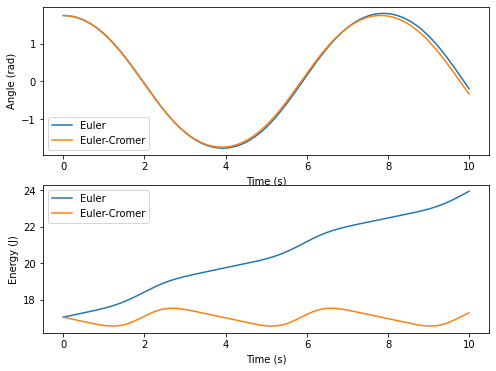

In [4]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(t, theta_euler, label='Euler')
plt.plot(t, theta_eulercromer, label='Euler-Cromer')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, energy_euler, label='Euler')
plt.plot(t, energy_eulercromer, label='Euler-Cromer')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

In [5]:
# Initialize arrays to store theta, omega, and energy
theta_verlet = np.zeros(len(t))
omega_verlet = np.zeros(len(t))
energy_verlet = np.zeros(len(t))

# Set initial values
theta_verlet[0] = theta_0
theta_verlet[1] = theta_0 + omega_0*dt + 0.5*(-g/L)*np.sin(theta_0)*dt**2
omega_verlet[0] = omega_0
omega_verlet[1] = omega_0 + 0.5*(-g/L)*(np.sin(theta_0) + np.sin(theta_verlet[1]))*dt
energy_verlet[0] = 0.5 * m * L**2 * omega_0**2 - m * g * L * np.cos(theta_0)

In [6]:
# Solve the equations of motion using Verlet method
for i in range(2, len(t)):
    # Update theta
    theta_verlet[i] = 2*theta_verlet[i-1] - theta_verlet[i-2] + (-g/L)*np.sin(theta_verlet[i-1])*dt**2
    
    # Update omega
    omega_verlet[i] = (theta_verlet[i] - theta_verlet[i-2]) / (2*dt)
    
    # Calculate energy
    energy_verlet[i] = 0.5 * m * L**2 * omega_verlet[i]**2 - m * g * L * np.cos(theta_verlet[i])

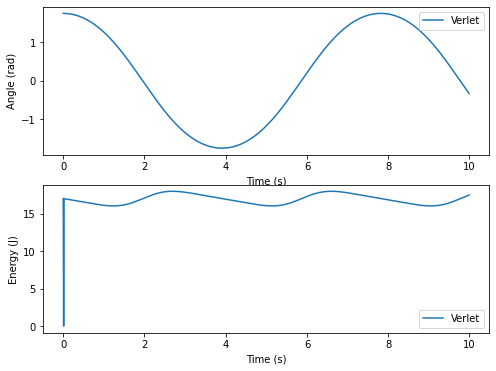

In [7]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(t, theta_verlet, label='Verlet')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, energy_verlet, label='Verlet')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()